In [78]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.metrics import mean_squared_error
from numpy import log

In [79]:
df = pd.read_csv("DATA/DATAFRAME_accessToCare.csv")
df = df[df['Subgroup'] != 'With disability']
df = df[df['Subgroup'] != 'Without disability']
df = df[df.Value.notnull()]
df

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
0,"Delayed or Did Not Get Care, Last 4 Weeks",National Estimate,United States,United States,1,1,Apr 23 - May 5,2020-04-23,2020-05-05,43.7,43.1,44.3,43.1 - 44.3,NaN
1,"Delayed or Did Not Get Care, Last 4 Weeks",By Age,United States,18 - 29 years,1,1,Apr 23 - May 5,2020-04-23,2020-05-05,40.8,38.3,43.4,38.3 - 43.4,NaN
2,"Delayed or Did Not Get Care, Last 4 Weeks",By Age,United States,30 - 39 years,1,1,Apr 23 - May 5,2020-04-23,2020-05-05,41.8,40.1,43.5,40.1 - 43.5,NaN
3,"Delayed or Did Not Get Care, Last 4 Weeks",By Age,United States,40 - 49 years,1,1,Apr 23 - May 5,2020-04-23,2020-05-05,45.6,44.0,47.2,44.0 - 47.2,NaN
4,"Delayed or Did Not Get Care, Last 4 Weeks",By Age,United States,50 - 59 years,1,1,Apr 23 - May 5,2020-04-23,2020-05-05,46.0,44.5,47.5,44.5 - 47.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2317,"Delayed or Did Not Get Care, Last 4 Weeks",By State,Virginia,Virginia,3.1,33,Jun 23 - Jul 5,2021-06-23,2021-07-05,17.3,13.6,21.6,13.6 - 21.6,14.4-17.5
2318,"Delayed or Did Not Get Care, Last 4 Weeks",By State,Washington,Washington,3.1,33,Jun 23 - Jul 5,2021-06-23,2021-07-05,21.7,18.8,24.9,18.8 - 24.9,19.8-29.2
2319,"Delayed or Did Not Get Care, Last 4 Weeks",By State,West Virginia,West Virginia,3.1,33,Jun 23 - Jul 5,2021-06-23,2021-07-05,15.9,12.2,20.1,12.2 - 20.1,14.4-17.5
2320,"Delayed or Did Not Get Care, Last 4 Weeks",By State,Wisconsin,Wisconsin,3.1,33,Jun 23 - Jul 5,2021-06-23,2021-07-05,10.6,8.1,13.5,8.1 - 13.5,10.6-14.3


In [80]:
# data = df.groupby(['Subgroup', 'Time Period']).mean()
# data.head()

data = pd.DataFrame()
for i in df.Subgroup.unique():
    data[i] = df[df.Subgroup == i].reset_index().Value
data

,United States,18 - 29 years,30 - 39 years,40 - 49 years,50 - 59 years,60 - 69 years,70 - 79 years,80 years and above,Male,Female,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,43.7,40.8,41.8,45.6,46.0,46.4,42.2,35.6,40.1,47.1,...,45.5,42.9,40.6,43.3,48.5,47.0,47.7,43.7,45.3,39.3
1,45.5,43.4,45.1,46.8,49.5,44.2,41.3,47.8,42.2,48.7,...,41.3,47.2,39.7,39.2,47.1,50.4,50.9,45.6,46.6,44.8
2,44.8,41.0,44.2,45.7,48.7,46.6,41.0,43.7,41.3,48.1,...,38.1,44.6,41.2,37.2,52.5,44.6,48.4,34.9,42.9,48.9
3,44.9,38.5,43.9,47.2,49.8,46.9,41.8,45.0,41.3,48.3,...,39.3,42.8,43.7,41.1,45.2,44.6,43.5,43.0,45.9,46.1
4,45.5,39.6,45.9,47.4,49.9,46.9,42.3,40.3,41.2,49.6,...,41.2,38.0,43.8,43.1,44.3,40.9,47.5,45.7,44.5,45.7
5,44.5,39.8,45.1,47.6,47.2,45.2,41.2,37.9,39.5,49.2,...,41.1,43.3,44.2,38.4,48.0,41.4,45.8,42.1,42.1,36.9
6,44.9,40.9,45.6,47.1,47.1,46.5,40.7,41.2,41.0,48.6,...,38.7,43.6,42.8,40.9,45.6,45.0,50.8,51.9,50.0,51.3
7,45.5,41.8,46.4,47.8,50.2,44.8,41.0,37.3,42.2,48.6,...,38.0,39.2,43.4,42.3,49.0,48.7,51.4,43.0,46.5,37.8
8,45.7,42.2,47.1,48.7,49.4,45.5,40.8,34.6,41.9,49.2,...,38.8,45.9,42.5,43.2,47.1,42.3,49.9,48.7,44.2,37.1
9,44.5,39.3,47.3,47.5,47.6,44.7,38.7,37.2,40.2,48.4,...,40.6,41.7,42.4,39.0,50.5,47.5,48.7,41.9,43.5,41.7


In [81]:
data.corr()

,United States,18 - 29 years,30 - 39 years,40 - 49 years,50 - 59 years,60 - 69 years,70 - 79 years,80 years and above,Male,Female,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
United States,1.000000,0.956998,0.988012,0.994207,0.995668,0.990528,0.984136,0.928505,0.998300,0.998978,...,0.945733,0.959701,0.966347,0.973094,0.958256,0.965315,0.977309,0.913946,0.974409,0.929243
18 - 29 years,0.956998,1.000000,0.965277,0.953715,0.938699,0.919376,0.912782,0.836018,0.954687,0.956405,...,0.901823,0.905549,0.952571,0.934975,0.910433,0.924906,0.933608,0.858086,0.928317,0.888865
30 - 39 years,0.988012,0.965277,1.000000,0.987038,0.978448,0.964093,0.953048,0.879639,0.983094,0.989076,...,0.927472,0.931213,0.977436,0.957963,0.937230,0.961034,0.968005,0.895972,0.954739,0.907656
40 - 49 years,0.994207,0.953715,0.987038,1.000000,0.988780,0.977887,0.969040,0.905356,0.993180,0.992303,...,0.935314,0.953831,0.967493,0.974355,0.945122,0.958228,0.969830,0.922104,0.957062,0.919193
50 - 59 years,0.995668,0.938699,0.978448,0.988780,1.000000,0.989254,0.981905,0.935129,0.995355,0.993678,...,0.940468,0.955462,0.958235,0.972290,0.956665,0.960972,0.973506,0.911028,0.968304,0.924190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Virginia,0.965315,0.924906,0.961034,0.958228,0.960972,0.950793,0.946477,0.895552,0.965938,0.962232,...,0.915474,0.936370,0.928308,0.931464,0.921931,1.000000,0.964779,0.886696,0.932327,0.875858
Washington,0.977309,0.933608,0.968005,0.969830,0.973506,0.967793,0.959947,0.904478,0.978434,0.974187,...,0.920025,0.956609,0.932744,0.949372,0.956113,0.964779,1.000000,0.923094,0.949497,0.916579
West Virginia,0.913946,0.858086,0.895972,0.922104,0.911028,0.909745,0.892220,0.850328,0.918143,0.908746,...,0.852404,0.907325,0.882692,0.896803,0.853587,0.886696,0.923094,1.000000,0.877446,0.852222
Wisconsin,0.974409,0.928317,0.954739,0.957062,0.968304,0.975508,0.975125,0.930257,0.973772,0.973022,...,0.940736,0.922802,0.928570,0.951988,0.945492,0.932327,0.949497,0.877446,1.000000,0.933745


In [82]:
a = data.corr()['United States']
a[a < 0.95]

80 years and above                 0.928505
Hispanic or Latino                 0.935445
Non-Hispanic Asian, single race    0.921213
Less than a high school diploma    0.868973
California                         0.949766
Delaware                           0.909121
District of Columbia               0.878447
Hawaii                             0.889756
Maine                              0.942546
Montana                            0.920591
Nebraska                           0.944056
Nevada                             0.947970
New Mexico                         0.897171
North Dakota                       0.881569
Oklahoma                           0.929570
Rhode Island                       0.915509
South Carolina                     0.945870
South Dakota                       0.945733
West Virginia                      0.913946
Wyoming                            0.929243
Name: United States, dtype: float64

In [83]:
data.corr()['United States']['18 - 29 years']

0.9569984021343843

In [84]:
data.corr()['United States'].index

Index(['United States', '18 - 29 years', '30 - 39 years', '40 - 49 years',
       '50 - 59 years', '60 - 69 years', '70 - 79 years', '80 years and above',
       'Male', 'Female', 'Hispanic or Latino',
       'Non-Hispanic White, single race', 'Non-Hispanic Black, single race',
       'Non-Hispanic Asian, single race',
       'Non-Hispanic, other races and multiple races',
       'Less than a high school diploma', 'High school diploma or GED',
       'Some college/Associate's degree', 'Bachelor's degree or higher',
       'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'Nor

In [85]:
any(a < 0.95)

True

In [86]:
[column for column in a.index[1:] if any(a > 0.95)]

['18 - 29 years',
 '30 - 39 years',
 '40 - 49 years',
 '50 - 59 years',
 '60 - 69 years',
 '70 - 79 years',
 '80 years and above',
 'Male',
 'Female',
 'Hispanic or Latino',
 'Non-Hispanic White, single race',
 'Non-Hispanic Black, single race',
 'Non-Hispanic Asian, single race',
 'Non-Hispanic, other races and multiple races',
 'Less than a high school diploma',
 'High school diploma or GED',
 "Some college/Associate's degree",
 "Bachelor's degree or higher",
 'Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode

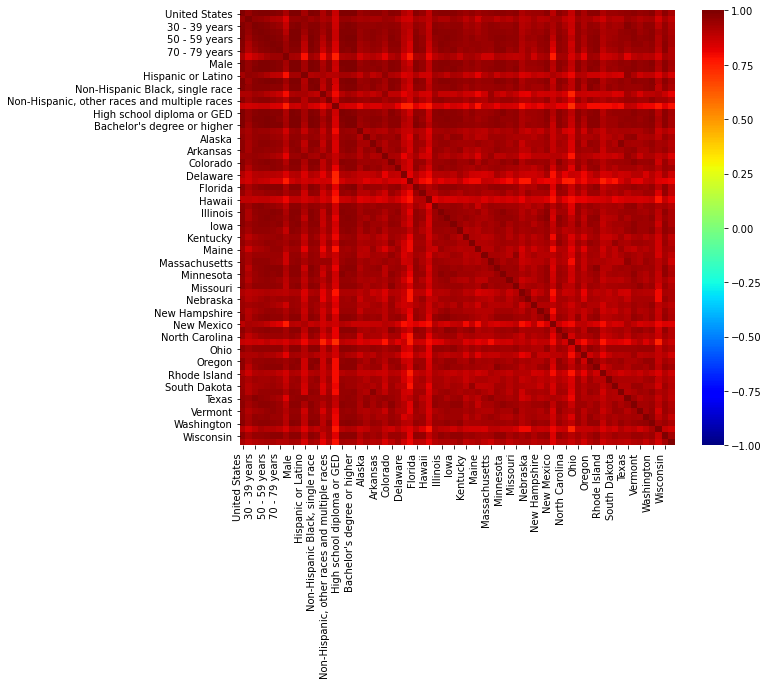

In [87]:
# data = pd.read_csv('https://raw.githubusercontent.com/drazenz/heatmap/master/autos.clean.csv')

# corr = data.corr()
plt.figure(figsize=(10,8))
ax = sns.heatmap(
    data.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap='jet',
    square=True,

)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

In [11]:
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
data.drop(to_drop, axis=1, inplace=True)

In [12]:
data

,United States,80 years and above,"Non-Hispanic Asian, single race",Less than a high school diploma,Delaware,District of Columbia,Hawaii,Montana,New Mexico,North Dakota,Oklahoma,Rhode Island,West Virginia,Wyoming
0,43.7,35.6,37.8,40.9,41.4,47.0,41.2,46.0,44.1,33.2,46.6,44.2,43.7,39.3
1,45.5,47.8,37.1,38.1,43.1,46.0,43.8,53.8,45.8,43.7,41.3,46.2,45.6,44.8
2,44.8,43.7,36.5,41.1,38.7,43.5,42.1,50.1,48.8,40.2,35.7,44.4,34.9,48.9
3,44.9,45.0,38.4,45.9,39.1,44.1,41.5,40.0,46.0,36.0,44.6,41.7,43.0,46.1
4,45.5,40.3,41.1,42.1,42.3,47.7,37.0,46.6,46.8,34.9,40.4,43.6,45.7,45.7
5,44.5,37.9,37.2,40.8,50.4,49.5,35.5,44.8,43.6,32.3,39.6,41.6,42.1,36.9
6,44.9,41.2,40.2,34.1,52.3,51.6,42.0,46.1,42.9,38.4,42.6,41.8,51.9,51.3
7,45.5,37.3,40.4,42.8,44.6,51.2,38.6,42.7,51.8,45.7,46.4,36.7,43.0,37.8
8,45.7,34.6,40.9,45.8,48.4,43.4,43.5,38.2,53.7,38.6,45.4,39.8,48.7,37.1
9,44.5,37.2,37.8,41.2,47.1,51.2,34.2,39.9,50.6,42.8,42.8,43.9,41.9,41.7


In [13]:
data.corr()

,United States,80 years and above,"Non-Hispanic Asian, single race",Less than a high school diploma,Delaware,District of Columbia,Hawaii,Montana,New Mexico,North Dakota,Oklahoma,Rhode Island,West Virginia,Wyoming
United States,1.000000,0.928505,0.921213,0.868973,0.909121,0.878447,0.889756,0.920591,0.897171,0.881569,0.929570,0.915509,0.913946,0.929243
80 years and above,0.928505,1.000000,0.791839,0.756569,0.838427,0.762243,0.811161,0.896972,0.758249,0.849523,0.824642,0.857481,0.850328,0.908108
"Non-Hispanic Asian, single race",0.921213,0.791839,1.000000,0.803826,0.820317,0.862915,0.847245,0.820752,0.859088,0.748668,0.873332,0.867491,0.907783,0.816841
Less than a high school diploma,0.868973,0.756569,0.803826,1.000000,0.747656,0.738743,0.762086,0.775082,0.864586,0.724132,0.856440,0.789741,0.768941,0.785442
Delaware,0.909121,0.838427,0.820317,0.747656,1.000000,0.823093,0.805509,0.870096,0.784193,0.867220,0.806982,0.849153,0.856008,0.865080
District of Columbia,0.878447,0.762243,0.862915,0.738743,0.823093,1.000000,0.777763,0.767388,0.804758,0.752321,0.799780,0.753304,0.835895,0.812044
Hawaii,0.889756,0.811161,0.847245,0.762086,0.805509,0.777763,1.000000,0.818036,0.786169,0.796236,0.812573,0.853190,0.778136,0.821779
Montana,0.920591,0.896972,0.820752,0.775082,0.870096,0.767388,0.818036,1.000000,0.784234,0.876871,0.817983,0.903104,0.802348,0.916498
New Mexico,0.897171,0.758249,0.859088,0.864586,0.784193,0.804758,0.786169,0.784234,1.000000,0.798347,0.890809,0.794498,0.811612,0.833783
North Dakota,0.881569,0.849523,0.748668,0.724132,0.867220,0.752321,0.796236,0.876871,0.798347,1.000000,0.793624,0.776379,0.746688,0.870791


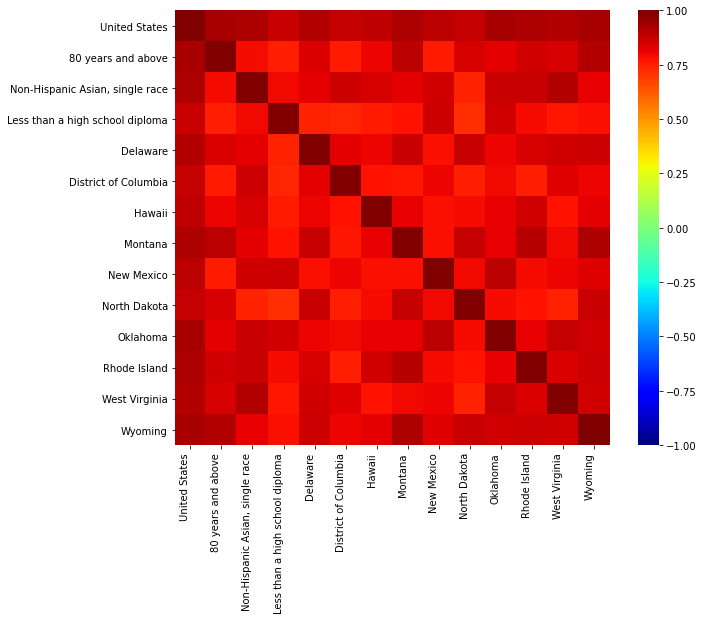

In [14]:
# data = pd.read_csv('https://raw.githubusercontent.com/drazenz/heatmap/master/autos.clean.csv')

# corr = data.corr()
plt.figure(figsize=(10,8))
ax = sns.heatmap(
    data.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap='jet',
    square=True,

)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

In [15]:
data

,United States,80 years and above,"Non-Hispanic Asian, single race",Less than a high school diploma,Delaware,District of Columbia,Hawaii,Montana,New Mexico,North Dakota,Oklahoma,Rhode Island,West Virginia,Wyoming
0,43.7,35.6,37.8,40.9,41.4,47.0,41.2,46.0,44.1,33.2,46.6,44.2,43.7,39.3
1,45.5,47.8,37.1,38.1,43.1,46.0,43.8,53.8,45.8,43.7,41.3,46.2,45.6,44.8
2,44.8,43.7,36.5,41.1,38.7,43.5,42.1,50.1,48.8,40.2,35.7,44.4,34.9,48.9
3,44.9,45.0,38.4,45.9,39.1,44.1,41.5,40.0,46.0,36.0,44.6,41.7,43.0,46.1
4,45.5,40.3,41.1,42.1,42.3,47.7,37.0,46.6,46.8,34.9,40.4,43.6,45.7,45.7
5,44.5,37.9,37.2,40.8,50.4,49.5,35.5,44.8,43.6,32.3,39.6,41.6,42.1,36.9
6,44.9,41.2,40.2,34.1,52.3,51.6,42.0,46.1,42.9,38.4,42.6,41.8,51.9,51.3
7,45.5,37.3,40.4,42.8,44.6,51.2,38.6,42.7,51.8,45.7,46.4,36.7,43.0,37.8
8,45.7,34.6,40.9,45.8,48.4,43.4,43.5,38.2,53.7,38.6,45.4,39.8,48.7,37.1
9,44.5,37.2,37.8,41.2,47.1,51.2,34.2,39.9,50.6,42.8,42.8,43.9,41.9,41.7


In [88]:
data.head()

,United States,18 - 29 years,30 - 39 years,40 - 49 years,50 - 59 years,60 - 69 years,70 - 79 years,80 years and above,Male,Female,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,43.7,40.8,41.8,45.6,46.0,46.4,42.2,35.6,40.1,47.1,...,45.5,42.9,40.6,43.3,48.5,47.0,47.7,43.7,45.3,39.3
1,45.5,43.4,45.1,46.8,49.5,44.2,41.3,47.8,42.2,48.7,...,41.3,47.2,39.7,39.2,47.1,50.4,50.9,45.6,46.6,44.8
2,44.8,41.0,44.2,45.7,48.7,46.6,41.0,43.7,41.3,48.1,...,38.1,44.6,41.2,37.2,52.5,44.6,48.4,34.9,42.9,48.9
3,44.9,38.5,43.9,47.2,49.8,46.9,41.8,45.0,41.3,48.3,...,39.3,42.8,43.7,41.1,45.2,44.6,43.5,43.0,45.9,46.1
4,45.5,39.6,45.9,47.4,49.9,46.9,42.3,40.3,41.2,49.6,...,41.2,38.0,43.8,43.1,44.3,40.9,47.5,45.7,44.5,45.7


In [89]:
train = data[:-5]
test = data[-5:]

In [102]:
model = VAR(train)
model_fit = model.fit(maxlags = 2)
yhat = model_fit.forecast(model_fit.y, steps=5)
results = pd.DataFrame(data = yhat, index=range(0,len(yhat)),columns=data.columns)

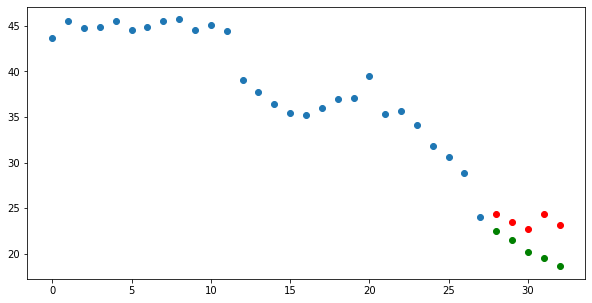

In [103]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(train.index, train['United States'])
ax.scatter(range(train.index[-1]+1, train.index[-1]+6), results['United States'], color = 'r')
ax.scatter(range(train.index[-1]+1, train.index[-1]+6), test['United States'], color = 'g')